In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.read_csv('ml-curated-data.csv')

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age,wage_increase
0,0.024181,-0.053836,-0.023294,-0.087671,0.059876,0.032627,0.015672,0.019090,0.016816,0.075232
1,0.001615,-0.023294,-0.063004,0.059876,0.032627,0.075232,0.015672,0.019090,0.016816,-0.021322
2,0.002881,-0.063004,0.131306,0.032627,0.075232,-0.021322,0.015672,0.019090,0.016816,-0.023162
3,0.093041,0.131306,-0.087671,0.075232,-0.021322,-0.023162,0.015672,0.019090,0.016816,-0.028393
4,-0.053836,-0.087671,0.059876,-0.021322,-0.023162,-0.028393,0.015672,0.019090,0.016816,0.028896
5,-0.023294,0.059876,0.032627,-0.023162,-0.028393,0.028896,0.015672,0.019090,0.016816,0.029645
6,-0.063004,0.032627,0.075232,-0.028393,0.028896,0.029645,0.015672,0.019090,0.016816,0.058821
7,0.131306,0.075232,-0.021322,0.028896,0.029645,0.058821,0.015672,0.019090,0.016816,0.024489
8,-0.087671,-0.021322,-0.023162,0.029645,0.058821,0.024489,0.015672,0.019090,0.016816,0.051312
9,0.059876,-0.023162,-0.028393,0.058821,0.024489,0.051312,0.015672,0.019090,0.016816,-0.065009


In [4]:
DATOS=datos=pd.read_csv('ml-curated-data.csv')

In [5]:
datos.head()

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age,wage_increase
0,0.024181,-0.053836,-0.023294,-0.087671,0.059876,0.032627,0.015672,0.01909,0.016816,0.075232
1,0.001615,-0.023294,-0.063004,0.059876,0.032627,0.075232,0.015672,0.01909,0.016816,-0.021322
2,0.002881,-0.063004,0.131306,0.032627,0.075232,-0.021322,0.015672,0.01909,0.016816,-0.023162
3,0.093041,0.131306,-0.087671,0.075232,-0.021322,-0.023162,0.015672,0.01909,0.016816,-0.028393
4,-0.053836,-0.087671,0.059876,-0.021322,-0.023162,-0.028393,0.015672,0.01909,0.016816,0.028896


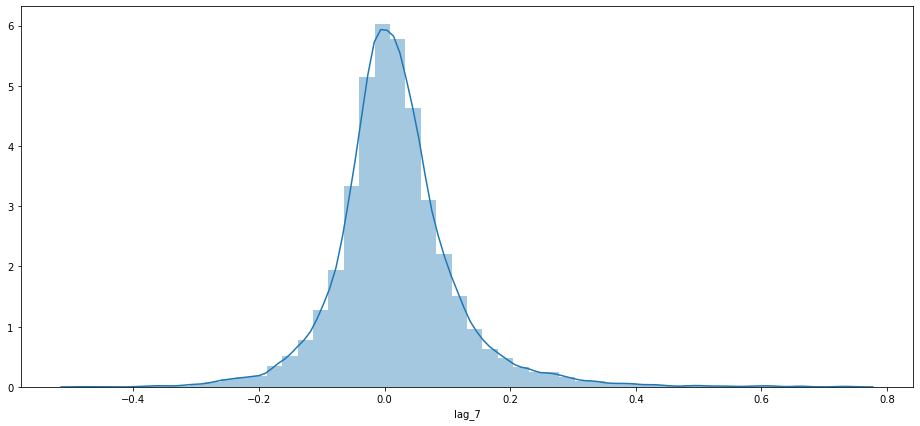

In [6]:
fig, ax=plt.subplots(figsize=(16,7))
sns.distplot(datos.iloc[:,1])


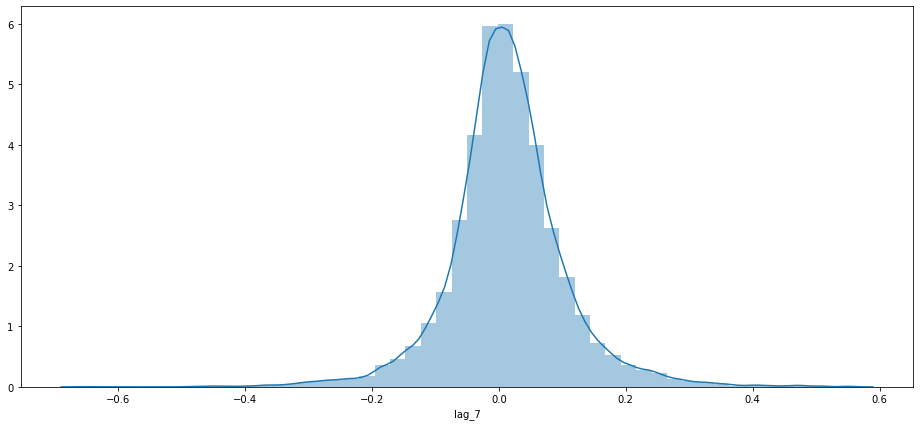

In [7]:
fig, ax=plt.subplots(figsize=(16,7))
sns.distplot(np.log1p(datos.iloc[:,1]))

In [8]:
X=datos.iloc[:,:-1]
Y=datos.iloc[:,-1]

In [9]:
X.head()

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age
0,0.024181,-0.053836,-0.023294,-0.087671,0.059876,0.032627,0.015672,0.01909,0.016816
1,0.001615,-0.023294,-0.063004,0.059876,0.032627,0.075232,0.015672,0.01909,0.016816
2,0.002881,-0.063004,0.131306,0.032627,0.075232,-0.021322,0.015672,0.01909,0.016816
3,0.093041,0.131306,-0.087671,0.075232,-0.021322,-0.023162,0.015672,0.01909,0.016816
4,-0.053836,-0.087671,0.059876,-0.021322,-0.023162,-0.028393,0.015672,0.01909,0.016816


In [10]:
X=datos.iloc[:,:-1]

In [11]:
X

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age
0,0.024181,-0.053836,-0.023294,-0.087671,0.059876,0.032627,0.015672,0.019090,0.016816
1,0.001615,-0.023294,-0.063004,0.059876,0.032627,0.075232,0.015672,0.019090,0.016816
2,0.002881,-0.063004,0.131306,0.032627,0.075232,-0.021322,0.015672,0.019090,0.016816
3,0.093041,0.131306,-0.087671,0.075232,-0.021322,-0.023162,0.015672,0.019090,0.016816
4,-0.053836,-0.087671,0.059876,-0.021322,-0.023162,-0.028393,0.015672,0.019090,0.016816
5,-0.023294,0.059876,0.032627,-0.023162,-0.028393,0.028896,0.015672,0.019090,0.016816
6,-0.063004,0.032627,0.075232,-0.028393,0.028896,0.029645,0.015672,0.019090,0.016816
7,0.131306,0.075232,-0.021322,0.028896,0.029645,0.058821,0.015672,0.019090,0.016816
8,-0.087671,-0.021322,-0.023162,0.029645,0.058821,0.024489,0.015672,0.019090,0.016816
9,0.059876,-0.023162,-0.028393,0.058821,0.024489,0.051312,0.015672,0.019090,0.016816


In [12]:
Xnorm=np.log1p(datos.iloc[:,:-1])

In [13]:
Xnorm.head()

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age
0,0.023893,-0.055339,-0.023569,-0.091754,0.058152,0.032106,0.015551,0.01891,0.016676
1,0.001614,-0.023569,-0.065077,0.058152,0.032106,0.072536,0.015551,0.01891,0.016676
2,0.002877,-0.065077,0.123372,0.032106,0.072536,-0.021553,0.015551,0.01891,0.016676
3,0.088964,0.123372,-0.091754,0.072536,-0.021553,-0.023434,0.015551,0.01891,0.016676
4,-0.055339,-0.091754,0.058152,-0.021553,-0.023434,-0.028804,0.015551,0.01891,0.016676


In [14]:
ceros= Y[Y==0].count()
unos= Y[Y==1].count()

In [15]:
ceros, unos

(0, 0)

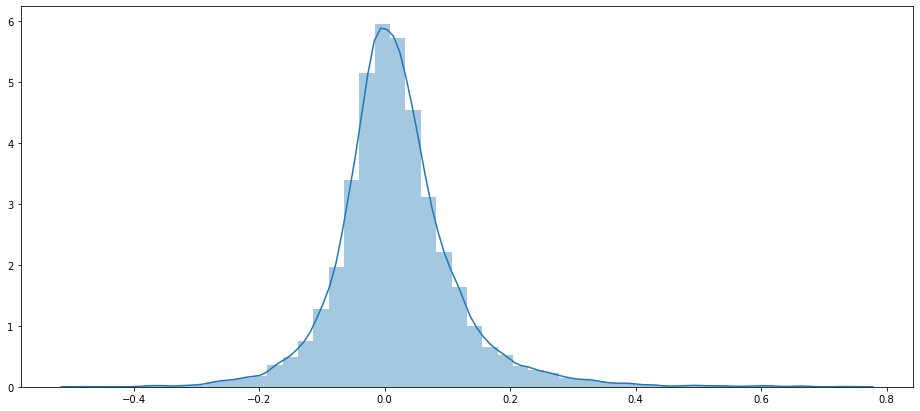

In [16]:
fig, ax=plt.subplots(figsize=(16,7))
sns.distplot(datos.iloc[:,5].unique())

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
Xtrain, Xtest, Ytrain, Ytest =train_test_split(X,Y, test_size=.3)

In [19]:
Xtrain.head()

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age
7682,-0.021824,-0.078948,0.332612,-0.124017,0.224834,-0.090398,0.023520,0.017736,0.015862
165,0.067540,-0.065768,0.077566,-0.020187,0.125865,-0.112197,0.015672,0.019090,0.026167
8786,0.074910,0.065879,-0.103324,0.192439,-0.039224,0.031911,0.015783,0.017736,0.026167
3805,-0.037625,-0.120342,0.054410,-0.033892,-0.036323,0.173142,0.020441,0.019090,0.015862
9119,0.020148,-0.019271,0.130161,0.039094,0.066443,-0.131626,0.020221,0.017736,0.026167


In [20]:
Ytrain = Ytrain.to_frame()

In [21]:
Ytrain

,wage_increase
7682,-0.010625
165,0.238549
8786,-0.099216
3805,0.024723
9119,0.077525
4989,-0.066855
9096,0.077288
1016,0.119907
8439,0.000102
1066,0.020712


In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
import random


def get_random_params():
    return {
        "criterion": random.choice(["mse", "friedman_mse", "mae"]),
        "splitter": random.choice(["best", "random"]),
        "max_depth": random.choice(list(range(1, 10)) + [None]),
        "max_features": random.choice((range(10, 100))) / 100
    }

param = get_random_params()
param

{'criterion': 'friedman_mse',
 'splitter': 'random',
 'max_depth': 8,
 'max_features': 0.37}

In [24]:
def get_rsme(df, param, target_col, features):
    train = df.sample(frac=0.7)
    test = df.drop(train.index)
    train_x = train.drop(target_col, 1)
    train_y = train.drop(features, 1)
    test_x = test.drop(target_col, 1)
    test_y = test.drop(features, 1)
    model=DecisionTreeRegressor(**param)
    model.fit(train_x, train_y)
    estimates = model.predict(train_x)
    error = np.asmatrix(train_y.values - estimates)
    sme = (error.T * error / len(error)).tolist()[0][0]
    return np.sqrt(sme)

In [25]:
get_rsme(datos, param, target_col="wage_increase", features=[c for c in datos.columns if c != "wage_increase"])

0.09786387164967471

In [27]:
result = []
for i in range(10):
    param = get_random_params()
    rsme = get_rsme(datos, param, target_col="wage_increase", features=[c for c in datos.columns if c != "wage_increase"])
    param["rsme"] = rsme

In [28]:
result_df = pd.DataFrame(result)
print (result_df)

Empty DataFrame
Columns: []
Index: []


In [29]:
print (rsme)

0.0960377704093971


In [30]:
np.sqrt(rsme)

0.30989961343860545

In [ ]:
model=DecisionTreeRegressor(**param)

In [ ]:
X

In [ ]:
Y

In [ ]:
model.fit(Xtrain, Ytrain)

In [ ]:
Ypredict=model.predict(Xtest)

In [ ]:
Comp=pd.DataFrame({'real': Ytest, 'Predict': Ypredict})

In [ ]:
Comp.head(10)

In [ ]:
Comp

In [ ]:
from sklearn.metrics import accuracy_score



In [ ]:
estimates = model.predict(Xtest)
error = np.asmatrix(Ytest.values - estimates)
sme = (error.T * error / len(error)).tolist()[0][0]
sme

In [ ]:
np.sqrt(sme)

In [ ]:
print (error)
df_errors = pd.DataFrame({'error': [e for ls in error.tolist() for e in ls]})
df_errors.plot.kde()
plt.title("Error distribution")
plt.xlabel("Error")
plt.grid()
plt.show()

100 * df_errors.describe()